In [1]:
import pandas, numpy

In [2]:
import sklearn, sklearn.preprocessing, sklearn.decomposition

In [3]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 
                            'font.family':'sans-serif', 
                            'xtick.labelsize':16, 
                            'ytick.labelsize':16, 
                            'figure.figsize':(16*(2/3), 9*(2/3)), 
                            'axes.labelsize':20
                           })

# 0. user-defined variables

In [4]:
input_file = '/Users/adrian/research/egilsstadir/results/deseq2/DESeq2_TPM_values.tsv'

# 1. read expression

In [5]:
expression = pandas.read_csv(input_file, sep='\t', index_col=0)
print(expression.shape)
expression

(39400, 12)


,C_17_18_1,C_17_18_2,C_17_18_3,C_17_42_1,C_17_42_2,C_17_42_3,C_KO1_63_1,C_KO1_63_2,C_KO1_63_3,C_WT_1,C_WT_2,C_WT_3
ENSG00000000003,14.266483,14.562258,15.596872,20.335713,21.170533,20.333565,23.660966,26.936171,27.606417,16.859558,18.328858,19.863569
ENSG00000000005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000000419,145.506108,164.662473,160.564616,199.509538,206.499623,216.344688,206.743270,224.522927,265.257969,123.878972,125.015988,160.943874
ENSG00000000457,5.435015,4.275768,5.763325,8.201322,7.842824,8.856341,15.231417,12.573769,13.819072,11.559401,10.871449,11.879078
ENSG00000000460,8.536390,9.468976,10.875246,7.420962,7.670167,8.539303,13.617320,10.916088,11.758257,13.034586,13.975526,9.320353
...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000293548,0.000000,0.000000,0.049192,0.000000,0.048145,0.257587,0.032292,0.000000,0.076050,0.000000,0.062153,0.081998
ENSG00000293550,0.296535,0.239497,0.319858,0.516854,0.768632,0.644327,0.209639,0.247794,0.393039,0.097142,0.220448,0.369293
ENSG00000293553,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.074879
ENSG00000293563,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# 3. filter and transform

In [6]:
substantial_expression = expression[expression.max(axis=1) >= 2]
high_expression = expression[expression.max(axis=1) >= 100]

print(substantial_expression.shape)
print(high_expression.shape)

(14794, 12)
(1867, 12)


In [7]:
transpose = substantial_expression.transpose()
pca_substantial_expression = numpy.log2(transpose + 1)

transpose = high_expression.transpose()
pca_high_expression = numpy.log2(transpose + 1)

# 4. visualize substantial expression

In [8]:
scaled_data = sklearn.preprocessing.StandardScaler().fit_transform(pca_substantial_expression)
model = sklearn.decomposition.PCA(n_components=2)
new = model.fit_transform(scaled_data)
explained = model.explained_variance_ratio_
print(explained)

[0.32006395 0.20710907]


In [9]:
my_colors = ['gold']*3 + ['skyblue']*3 + ['tab:red']*3 + ['black']*3
my_markers = ['o']*12

legend_elements = [
    
    matplotlib.lines.Line2D([0], [0], color='white', marker='o', markerfacecolor='gold', markeredgecolor='white', markersize=20, alpha=2/3),
    matplotlib.lines.Line2D([0], [0], color='white', marker='o', markerfacecolor='skyblue', markeredgecolor='white', markersize=20, alpha=2/3),
    matplotlib.lines.Line2D([0], [0], color='white', marker='o', markerfacecolor='tab:red', markeredgecolor='white', markersize=20, alpha=2/3),
    matplotlib.lines.Line2D([0], [0], color='white', marker='o', markerfacecolor='black', markeredgecolor='white', markersize=20, alpha=2/3)
    
]

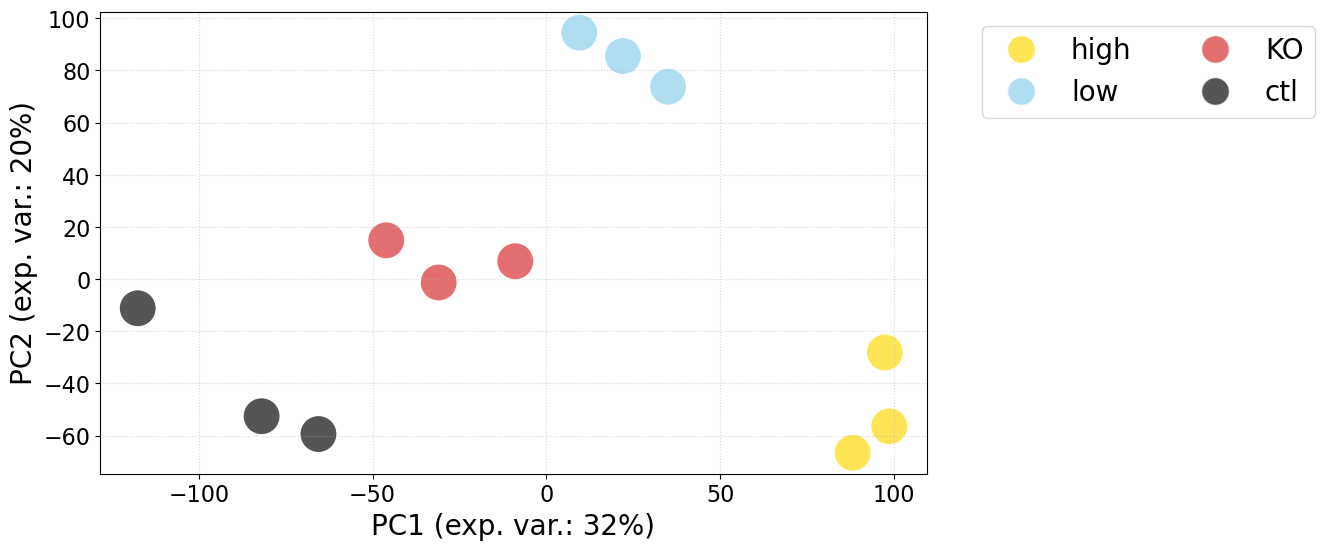

In [10]:
for i in range(len(new)):
    matplotlib.pyplot.scatter(new[i,0], new[i,1], s=666, c=my_colors[i], marker=my_markers[i], alpha=2/3, edgecolors='none')

matplotlib.pyplot.legend(legend_elements, ['high', 'low', 'KO', 'ctl'], ncol=2, loc='upper left', bbox_to_anchor=(1.05, 1))
    
matplotlib.pyplot.xlabel('PC1 (exp. var.: {}%)'.format(int(explained[0]*100)))
matplotlib.pyplot.ylabel('PC2 (exp. var.: {}%)'.format(int(explained[1]*100)))
matplotlib.pyplot.grid(alpha=0.5, ls=':')
#matplotlib.pyplot.tight_layout()

# 4. visualize high expression

In [11]:
scaled_data = sklearn.preprocessing.StandardScaler().fit_transform(pca_high_expression)
model = sklearn.decomposition.PCA(n_components=2)
new = model.fit_transform(scaled_data)
explained = model.explained_variance_ratio_
print(explained)

[0.41604161 0.21298897]


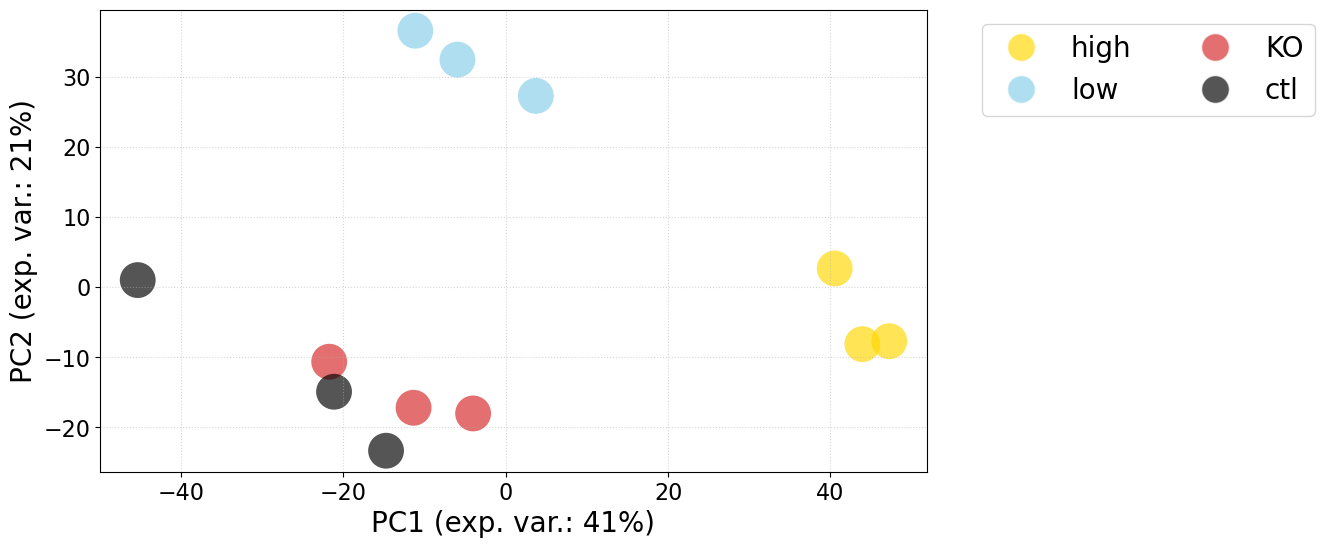

In [12]:
for i in range(len(new)):
    matplotlib.pyplot.scatter(new[i,0], new[i,1], s=666, c=my_colors[i], marker=my_markers[i], alpha=2/3, edgecolors='none')
    
matplotlib.pyplot.legend(legend_elements, ['high', 'low', 'KO', 'ctl'], ncol=2, loc='upper left', bbox_to_anchor=(1.05, 1))
    
matplotlib.pyplot.xlabel('PC1 (exp. var.: {}%)'.format(int(explained[0]*100)))
matplotlib.pyplot.ylabel('PC2 (exp. var.: {}%)'.format(int(explained[1]*100)))
matplotlib.pyplot.grid(alpha=0.5, ls=':')
#matplotlib.pyplot.tight_layout()

#matplotlib.pyplot.show()
matplotlib.pyplot.savefig('pca.svg')